author: [@sparshsah](https://github.com/sparshsah)

DISCLAIMER: Read this document at your own risk! Not only could it be a total waste of time, it might make you a straight-up dumber, more-biased, and just generally worse investor. I am not necessarily an expert in EITHER finance or investing in general OR any products mentioned below. I am NOT a financial advisor, and this analysis is NOT professional financial advice NOR to be interpreted as such. Unless someone has a fiduciary legal obligation to you, you should NEVER trust him or her to put your best interest before their own. As always, past investment performance CANNOT guarantee future results, ESPECIALLY when faced with limited history or short horizons. You could lose part or ALL of your initial principal. To the extent that I present data and/or calculations, I CANNOT promise that they are correct OR useful. Opinions, if and where present, are (a) my own and (b) NOT to be interpreted as professional financial advice. This is NOT a recommendation, solicitation, or offer EITHER to take a position in or trade any security, derivative, fund shares, or other asset, OR to enter into any contract, agreement, or other financial relationship. Before making any personal financial or investment decisions, consult with a qualified professional financial advisor about how to build a disciplined portfolio that is best for you.

DISCLOSURES: Between 2018 and 2022, I was with AQR and worked on, among other things, styles research, including research that flowed into QSPNX, one of the products I mention below. I hold VMNFX in my personal portfolio. This analysis is not sponsored, commissioned, or vetted by any financial advisor or investment manager; I have not and will not get paid to say or imply anything below; and I have no commercial interests in its publication, circulation, or effects.

DATA SOURCES: SPY, QSPNX, QMNNX, and VMNFX live adjusted close price history is from Yahoo Finance.

# Remember the portfolio food pyramid!

[https://github.com/sparshsah/foggy-demo/blob/main/demo/finance/pflio-food.pdf](https://github.com/sparshsah/foggy-demo/blob/main/demo/finance/pflio-food.pdf).

# Setting

Styles are systematic, intuitive, and well-documented sources of expected returns uncorrelated with stock-, bond-, or commodity-market returns (often implemented using leverage, shorting, and/or derivatives).

Say uncorrelated alternatives like styles and global macro have Sharpes of 0.25 each, whereas a balanced basket of of stocks, bonds, and real estate can give you 0.60. Even then, the alternatives are valuable diversifiers: The saying goes "don't put all your eggs in one basket", not "find the best basket and stuff all your eggs into it". You don't want to go crazy with the low-Sharpe stuff, but they're a nice garnish.

However, during times when the conditional Sharpe of stocks and bonds is low or even negative, these uncorrelated alternatives becomes even more valuable as the only game in town: It's them (expected nonnegative profit) or cash (guaranteed zero profit).

For some background about the current state of the union for styles (particularly Value), have a listen to Morningstar's Long View [podcast](https://www.youtube.com/watch?v=hSFsE82zwDg) with Cliff Asness from 2022 May.

I will compare the live net-of-fee net-of-tcost performance of three styles-driven mutual funds available to individual investors in the US as of 2022-06-09.


## QSPNX, "AQR Style Premia Alternative Fund": AQR's Market-Neutral Stock-Selection-and-Global-Macro Styles Mutual Fund (N share class)
* [Offering documents](https://funds.aqr.com/funds/alternatives/aqr-style-premia-alternative-fund/qspnx)
* Profiles: [Morningstar](https://www.morningstar.com/funds/xnas/qspnx/quote), [Fidelity](https://fundresearch.fidelity.com/mutual-funds/view-all/00203H412)
### Fast facts:
* Manager: AQR
* Manager inception date: 1998 (24 years ago)
* Fund Category: Core liquid-alternative
* Fund target volatility (stated): 10\%
* Fund inception date (for earliest share class): 2013-10-30 (9 years ago)
* Fund AUM (across all share classes): \$943M
* Minimum investment (N share class via JPMorganChase YouInvest): \$1M
### Strategy:
* Four styles (Value, Momentum, Carry, and Defensive including Quality \& BAB) across five asset classes (Single-name stocks \& industries, Stock indices, Yield curve, Currencies, and Commodities).

## QMNNX, "AQR Equity Market Neutral Fund": AQR's Market-Neutral Stock-Selection-only Styles+Alpha Mutual Fund (N share class)
* [Offering documents](https://funds.aqr.com/funds/alternatives/aqr-equity-market-neutral-fund/qmnnx)
* Profiles: [Morningstar](https://www.morningstar.com/funds/xnas/qmnnx/quote), [Fidelity](https://fundresearch.fidelity.com/mutual-funds/view-all/00191K781)
### Fast facts:
* Manager: AQR
* Manager inception date: 1998 (24 years ago)
* Fund category: Liquid alternative -- Market-neutral stock selection
* Fund target volatility (stated): 6\%
* Fund inception date (for earliest share class): 2014-10-07 (8 years ago)
* Fund AUM (across all share classes): \$146M
* Minimum investment (N share class via JPMorganChase YouInvest): \$1M
### Strategy:
* Four styles (Value, Momentum, Carry, and Defensive including Quality \& BAB) in a single asset class (Single-name stocks \& industries).
* AQR Global Stock Selection team's market-neutral systematic alpha signals in single-name stocks \& industries.

## VMNFX, "Vanguard Market Neutral Fund": Vanguard's Market-Neutral Stock-Selection Mutual Fund (F share class)
* Offering documents for [advisors](https://advisors.vanguard.com/investments/products/vmnfx/vanguard-market-neutral-fund-investor-shares) and [investors](https://investor.vanguard.com/mutual-funds/profile/VMNFX)
* Profiles: [Morningstar](https://www.morningstar.com/funds/xnas/vmnfx/quote), [Fidelity](https://fundresearch.fidelity.com/mutual-funds/view-all/92205G104), [Two Sigma](https://www.venn.twosigma.com/vennsights/article/blog-post-alpha)
### Fast facts:
* Manager: Vanguard
* Manager inception date: 1975 (47 years ago)
* Fund category: Liquid alternative -- Market-neutral stock selection
* Fund target volatility (inferred): 7\%
* Fund Inception date (for earliest share class): 1998-11-11 (24 years ago)
* Fund AUM (across all share classes): \$630M
* Minimum investment (F share class via JPMorganChase YouInvest): \$0
### Strategy:
* Market- AND industry- AND size-neutral styles (such as Value, Momentum, and Quality) in a single asset class (US large-, mid-, and small-cap single-name stocks).
* Vanguard Quantitative Equity Group's market- AND industry- AND size-neutral systematic alpha signals in US large-, mid-, and small-cap single-name stocks.

# Data loading

In [204]:
import sys
# https://github.com/sparshsah/foggy-lib/tree/main/util
sys.path.insert(0, "../../../foggy-lib/util")
del sys

import pandas as pd
import numpy as np
# https://github.com/sparshsah/foggy-lib/tree/main/util/foggy_pylib
import foggy_pylib.core as fc
import foggy_pylib.fin as ff


KIND = "log"
TICKERS = ["SPY", "QSPNX", "QMNNX", "VMNFX"]

def _get_pnl(ticker="qspnx"):
    px = pd.read_csv(f"data/yahoo-finance_{ticker}_px.csv", index_col=0, parse_dates=True)["Adj Close"]
    pnl = ff._get_r_from_px(px=px, kind=KIND)
    return pnl

def get_pnl():
    pnl = {ticker: _get_pnl(ticker=ticker) for ticker in TICKERS}
    pnl = pd.DataFrame(pnl, columns=TICKERS)
    # ignore the stuff prior to the last-to-show-up active fund or after the first-to-drop-out active fund
    start_date = max(_pnl.first_valid_index() for ticker, _pnl in pnl.iteritems() if ticker != "spy")
    end_date = min(_pnl.last_valid_index() for ticker, _pnl in pnl.iteritems() if ticker != "spy")
    pnl = pnl.loc[start_date:end_date, :]
    return pnl

pnl = get_pnl()

# Visualization

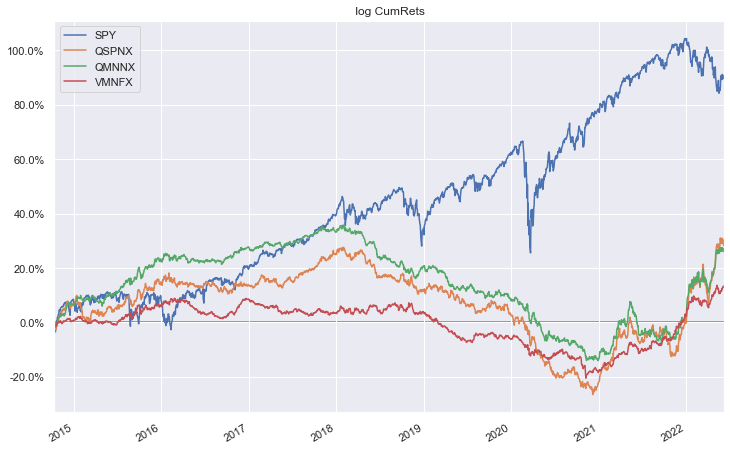

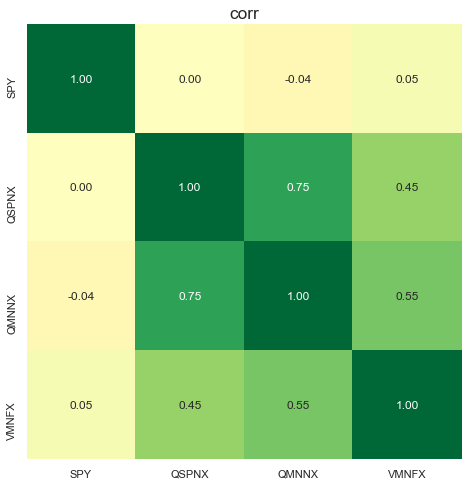

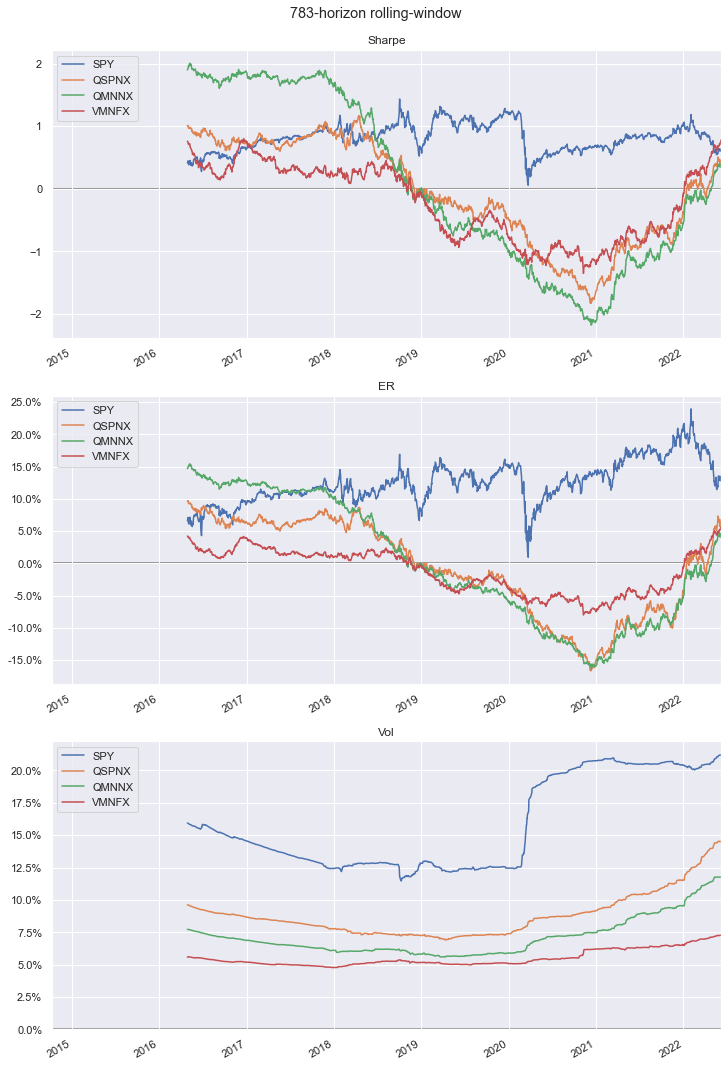

      Sharpe t-stat      ER     Vol Frac valid timesteps  \
SPY     0.71   1.93  0.1213  0.1711                    1   
QSPNX   0.34   0.93  0.0382  0.1114                    1   
QMNNX   0.39   1.06  0.0352  0.0899                    1   
VMNFX   0.28   0.77  0.0175  0.0614                    1   

      Total valid timesteps Total timesteps First timestep  \
SPY                    1929            1929     2014-10-10   
QSPNX                  1929            1929     2014-10-10   
QMNNX                  1929            1929     2014-10-10   
VMNFX                  1929            1929     2014-10-10   

      First valid timestep Last valid timestep Last timestep  
SPY             2014-10-10          2022-06-08    2022-06-08  
QSPNX           2014-10-10          2022-06-08    2022-06-08  
QMNNX           2014-10-10          2022-06-08    2022-06-08  
VMNFX           2014-10-10          2022-06-08    2022-06-08  


In [205]:
reload(fc)
reload(ff)
ff.chart_r(pnl)